In [1]:
#CSV Bibliothek importieren 
import csv
#Pandas importieren und als pd bezeichnen
import pandas as pd
#Numpy importieren und als np bezeichnen 
import numpy as np
#Json Biliothek importieren
import json
#Obere Schranke für die Größe der Daten auf 100,000,000 setzen  
csv.field_size_limit(100000000)
#Maximale Anzahl von Zeilen und Spalten Zeigen 
pd.options.display.max_columns = None
pd.options.display.max_rows = None
#Seaborn für die Plots importieren
import seaborn as sns
#matplotlib für die Plots importieren
import matplotlib.pyplot as plt
#pickle wird füe das Speichern des Modells benutzt
import pickle
#Das LogisticRegression Modell importieren 
from sklearn.linear_model import LogisticRegression
#DecisionTreeClassifier importieren
from sklearn.tree import DecisionTreeClassifier
#train_test_split importieren, um die Daten für das Training und Testing teilen.
from sklearn.model_selection import train_test_split
#Die Metrik-Funktionen aus SKlearn importieren 
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, classification_report, log_loss
#cross_val_score Für die Cross Validiereung der Ergebnisse importieren
from sklearn.model_selection import cross_val_score
#Warnings zu Console umleiten
import warnings
warnings.filterwarnings("ignore")
#Die Nachkommastellen auf 4 einschränken
pd.options.display.float_format = '{:.4f}'.format


# **Logostic Regression** 
## *(1) TweetsCov19*
#### (Inhalt- und Benutzerfeatures)

In [2]:
#Die Dataframe, die sowohl die Benutzer- als auch die Inhaltsfeatures enthält, wird gelesen.
pfad_tsv = 'C:/Mo/tweetDB/tweetscov19/TweetsCov19_tsv/data_sample/Tweetscov19_sample/TweetsFormodel/tweetsCov19_sample_with_users_1_48.tsv'

df_tweetscov19_user = pd.read_csv(pfad_tsv, sep='\t', error_bad_lines=False, names=['Tweet_Id', 'Username', 'Is_deleted', 'Retweets', 'Likes', 'Stimmung', 'Hashtags', 'Mentions', 'Textlänge', 'URLs n.', 'Lesbarkeit', 'A. Emojis', 'Emoji sentiment', 'Politische P.T.', 'Wissenschaftliche P.T.', 'Moderate P.T.', 'Porn(Shalla)', 'News(Shalla)', 'Socialnet(Shalla)', 'Social', 'Family', 'Friend', 'Female', 'Male' , 'Work', 'Leisure', 'Home', 'Money', 'Relegion', 'Death', 'Informal', 'Swear', 'Netspeak', 'Assent', 'Nonfluence', 'Filler', 'Body', 'Health', 'Sexual', 'Ingest', 'Pos. emo.', 'Neg. emo.', 'Anxiety', 'Anger', 'Sadness', 'Insight', 'Cause', 'Discrep', 'Tentativness', 'Certainty', 'Differentiation', 'Affiliation', 'Achieve', 'Power', 'Reward', 'Risk', 'Focus past', 'Focus present', 'Focus future', 'I', 'We', 'You', 'SheHe', 'They', 'Ipron', 'Article', 'Preposition', 'Auxverb', 'Adverb', 'Conjunctive', 'Negate', 'Verb', 'Adjective', 'Compare', 'Interrogative', 'Number', 'Quantitative', 'See', 'Hear', 'Feel', 'Motion', 'Space', 'Time', 'Politische P.B.', 'Wissen. P.B.', 'Moderate P.B.', 'Posted n.', 'Deleted n.', 'Deletion ratio', 'Reputation'  ])

print('Shape :', df_tweetscov19_user.shape)
df_tweetscov19_user.head()

Shape : (20000, 90)


,Tweet_Id,Username,Is_deleted,Retweets,Likes,Stimmung,Hashtags,Mentions,Textlänge,URLs n.,Lesbarkeit,A. Emojis,Emoji sentiment,Politische P.T.,Wissenschaftliche P.T.,Moderate P.T.,Porn(Shalla),News(Shalla),Socialnet(Shalla),Social,Family,Friend,Female,Male,Work,Leisure,Home,Money,Relegion,Death,Informal,Swear,Netspeak,Assent,Nonfluence,Filler,Body,Health,Sexual,Ingest,Pos. emo.,Neg. emo.,Anxiety,Anger,Sadness,Insight,Cause,Discrep,Tentativness,Certainty,Differentiation,Affiliation,Achieve,Power,Reward,Risk,Focus past,Focus present,Focus future,I,We,You,SheHe,They,Ipron,Article,Preposition,Auxverb,Adverb,Conjunctive,Negate,Verb,Adjective,Compare,Interrogative,Number,Quantitative,See,Hear,Feel,Motion,Space,Time,Politische P.B.,Wissen. P.B.,Moderate P.B.,Posted n.,Deleted n.,Deletion ratio,Reputation
0,1247496374351994880,604ad6d57aa7e0cdecdb05b420470b11,True,0,0,0.0000,2,1,119,1,46.9420,0,0.0000,-1,0,1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5.8800,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5.8800,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5.8800,11.7600,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5.8800,0.0000,0.0000,0.0000,0.0000,5.8800,5.8800,0.4286,-0.1429,0.2000,24,24,1.0000,0.0000
1,1254519280063991808,636af432dc9192d910cb80f908ed3ddd,True,1,0,0.0000,1,1,144,1,48.6350,0,0.0000,0,0,-1,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.1700,0.0000,0.0000,4.1700,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.1700,4.1700,4.1700,4.1700,4.1700,4.1700,0.0000,4.1700,0.0000,4.1700,0.0000,4.1700,4.1700,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,12.5000,0.0000,0.0000,8.3300,0.0000,8.3300,8.3300,8.3300,0.0000,0.0000,4.1700,0.0000,0.0000,0.0000,0.0000,8.3300,4.1700,0.6364,-0.0476,0.5714,41,41,1.0000,0.4881
2,1222335084365275136,fcd6ec7badb73ba219a74c367e2a3bb0,True,0,0,0.4019,1,1,119,1,28.0500,0,0.0000,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5.2600,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,10.5300,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5.2600,0.0000,15.7900,0.0000,0.0000,0.0000,0.0000,10.5300,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5.2600,0.0000,1.0000,-1.0000,1.0000,3,3,1.0000,0.5052
3,1266089390859845632,c4fd6f9a730d278256fd08620a6e513e,True,34,51,-0.7033,0,0,163,0,56.7000,0,0.0000,0,0,0,0.0000,0.0000,0.0000,7.6900,0.0000,0.0000,0.0000,7.6900,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,3.8500,0.0000,0.0000,0.0000,0.0000,0.0000,7.6900,0.0000,0.0000,7.6900,3.8500,0.0000,0.0000,0.0000,0.0000,3.8500,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,3.8500,11.5400,1.0000,-1.0000,1.0000,31,31,1.0000,0.7145
4,1196450971062341632,58eb458bc750cac884e8e93bb3968ce8,True,2,0,-0.7906,0,0,208,1,50.4010,2,0.1225,1,-1,1,0.0000,0.0000,0.0000,5.5600,0.0000,0.0000,0.0000,0.0000,5.5600,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.7800,0.0000,0.0000,2.7800,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.7800,2.7800,2.7800,0.0000,2.7800,0.0000,2.7800,0.0000,0.0000,2.7800,0.0000,0.0000,0.0000,2.7800,2.7800,13.8900,2.7800,0.0000,0.0000,0.0000,5.5600,0.0000,0.0000,2.7800,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.7800,2.7800,1.0000,-1.0000,1.0000,4,4,1.0000,0.5258


In [3]:
#Anzahl der einzigartigen Benutzer in Dataframe
df_tweetscov19_user.Username.unique().size

5120

In [4]:
#Gelöschte und nicht gelöschte Tweets werden getrennet.
df_tweetscov19_del = df_tweetscov19_user[df_tweetscov19_user['Is_deleted']==True]
df_tweetscov19_undel = df_tweetscov19_user[df_tweetscov19_user['Is_deleted']==False]

In [5]:
#Mithilfe von seaborn ein Pairplot von gegeben Features darstellen
def plot_paiplot(df, hue, titel): 
   
    #fig, ax = plt.subplots()
    sns.pairplot(df, hue = hue)
    #plt.margins(0.02)
    #fig.tight_layout()
    #plt.show()

    #plt.savefig('C:/Mo/tweetDB/tweetscov19/TweetsCov19_tsv/data_aus_tsv/plot/log_reg/'+titel+'.jpg')

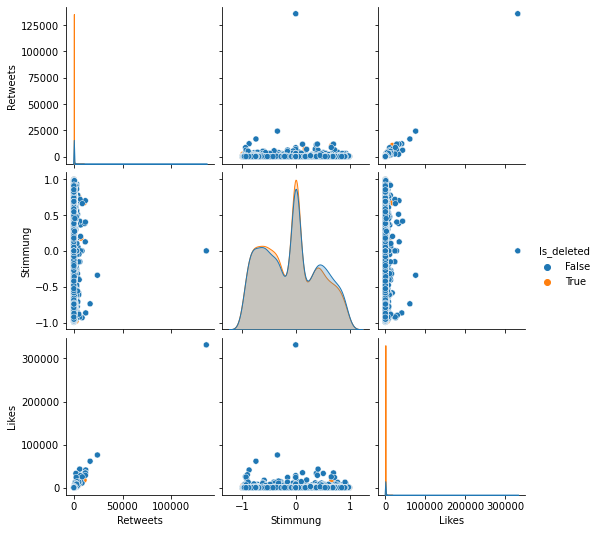

In [6]:
df = df_tweetscov19_user[['Is_deleted', 'Retweets', 'Stimmung', 'Likes']]
plot_paiplot(df, 'Is_deleted', 'pairplot_tweetsocv19_Retweet_favoriet_sentiment')

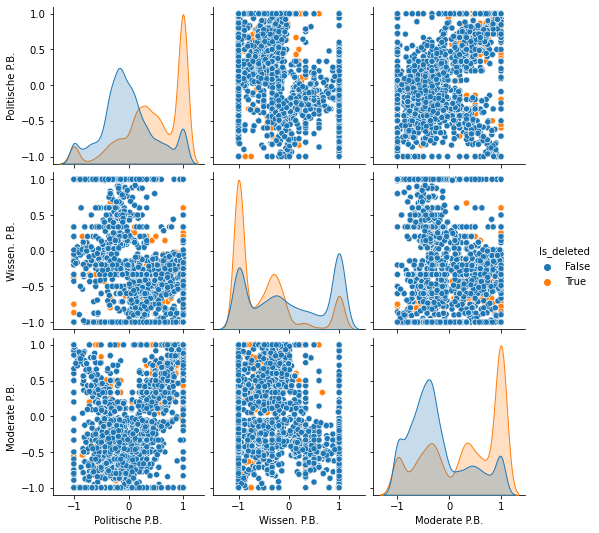

In [7]:
df = df_tweetscov19_user[['Is_deleted', 'Politische P.B.', 'Wissen. P.B.', 'Moderate P.B.']]
plot_paiplot(df, 'Is_deleted', 'pairplot_tweetsocv19_politic_science_moderacy')

<AxesSubplot:xlabel='Is_deleted', ylabel='count'>

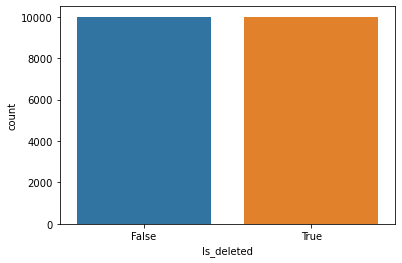

In [8]:
#Die Anzahl der gelöschten und nicht gelöschten Tweets darstellen 
sns.countplot(x = 'Is_deleted', data = df)

In [9]:
#Features von Dataframe auswählen
features = df_tweetscov19_user.columns
features

Index(['Tweet_Id', 'Username', 'Is_deleted', 'Retweets', 'Likes', 'Stimmung',
       'Hashtags', 'Mentions', 'Textlänge', 'URLs n.', 'Lesbarkeit',
       'A. Emojis', 'Emoji sentiment', 'Politische P.T.',
       'Wissenschaftliche P.T.', 'Moderate P.T.', 'Porn(Shalla)',
       'News(Shalla)', 'Socialnet(Shalla)', 'Social', 'Family', 'Friend',
       'Female', 'Male', 'Work', 'Leisure', 'Home', 'Money', 'Relegion',
       'Death', 'Informal', 'Swear', 'Netspeak', 'Assent', 'Nonfluence',
       'Filler', 'Body', 'Health', 'Sexual', 'Ingest', 'Pos. emo.',
       'Neg. emo.', 'Anxiety', 'Anger', 'Sadness', 'Insight', 'Cause',
       'Discrep', 'Tentativness', 'Certainty', 'Differentiation',
       'Affiliation', 'Achieve', 'Power', 'Reward', 'Risk', 'Focus past',
       'Focus present', 'Focus future', 'I', 'We', 'You', 'SheHe', 'They',
       'Ipron', 'Article', 'Preposition', 'Auxverb', 'Adverb', 'Conjunctive',
       'Negate', 'Verb', 'Adjective', 'Compare', 'Interrogative', 'Number',
 

In [10]:
#Die gelöscten Tweets mit 0 und nicht Gelösschten mit 1 markieren.
df_tweetscov19_user['Is_deleted'] = np.where(df_tweetscov19_user['Is_deleted'] == True, 0, 1)

In [11]:
df_tweetscov19_user.tail()

,Tweet_Id,Username,Is_deleted,Retweets,Likes,Stimmung,Hashtags,Mentions,Textlänge,URLs n.,Lesbarkeit,A. Emojis,Emoji sentiment,Politische P.T.,Wissenschaftliche P.T.,Moderate P.T.,Porn(Shalla),News(Shalla),Socialnet(Shalla),Social,Family,Friend,Female,Male,Work,Leisure,Home,Money,Relegion,Death,Informal,Swear,Netspeak,Assent,Nonfluence,Filler,Body,Health,Sexual,Ingest,Pos. emo.,Neg. emo.,Anxiety,Anger,Sadness,Insight,Cause,Discrep,Tentativness,Certainty,Differentiation,Affiliation,Achieve,Power,Reward,Risk,Focus past,Focus present,Focus future,I,We,You,SheHe,They,Ipron,Article,Preposition,Auxverb,Adverb,Conjunctive,Negate,Verb,Adjective,Compare,Interrogative,Number,Quantitative,See,Hear,Feel,Motion,Space,Time,Politische P.B.,Wissen. P.B.,Moderate P.B.,Posted n.,Deleted n.,Deletion ratio,Reputation
19995,1264046188346695681,4b289ad7423932d18b61af4f13ce90fa,1,5,4,0.8531,1,0,266,0,59.2800,0,0.0000,0,0,0,0.0000,0.0000,0.0000,4.4400,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.2200,0.0000,0.0000,2.2200,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.2200,2.2200,0.0000,0.0000,4.4400,2.2200,0.0000,0.0000,0.0000,0.0000,11.1100,0.0000,0.0000,4.4400,0.0000,0.0000,0.0000,0.0000,2.2200,8.8900,8.8900,2.2200,2.2200,0.0000,15.5600,2.2200,2.2200,0.0000,2.2200,0.0000,0.0000,0.0000,0.0000,2.2200,0.0000,4.4400,-0.0142,-0.2000,-0.3289,2985,0,0.0000,0.5332
19996,1238923377164902402,e1d66715bf953980a28a98539d297628,1,1,0,0.0000,1,1,286,1,24.0310,4,0.2273,0,0,0,0.0000,0.0000,0.0000,10.5300,0.0000,0.0000,0.0000,0.0000,2.6300,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.6300,0.0000,0.0000,2.6300,0.0000,0.0000,0.0000,0.0000,2.6300,0.0000,0.0000,0.0000,2.6300,0.0000,5.2600,0.0000,0.0000,0.0000,0.0000,0.0000,5.2600,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,7.8900,2.6300,5.2600,0.0000,0.0000,2.6300,2.6300,0.0000,0.0000,0.0000,2.6300,0.0000,0.0000,0.0000,2.6300,5.2600,5.2600,-0.1429,1.0000,-0.6000,26,0,0.0000,0.9655
19997,1236449705875230720,3b830bcc957c025498f9c5d9880a6b16,1,0,0,-0.4215,0,0,93,0,87.2840,0,0.0000,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6.2500,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6.2500,6.2500,0.0000,0.0000,6.2500,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6.2500,6.2500,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6.2500,6.2500,0.0000,12.5000,0.0000,0.0000,0.0000,12.5000,6.2500,0.0000,0.0000,0.0000,0.0000,6.2500,0.0000,0.0000,0.0000,6.2500,0.0000,0.0811,-0.3333,-0.2475,1185,12,0.0101,0.9945
19998,1265759231413649408,5e0d7812f8f2d82e32ec0988b45c238d,1,3,2,-0.9231,0,0,240,1,49.6500,0,0.0000,-1,0,-1,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.5600,0.0000,0.0000,0.0000,7.6900,2.5600,0.0000,2.5600,0.0000,0.0000,0.0000,0.0000,0.0000,2.5600,0.0000,0.0000,2.5600,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.5600,5.1300,12.8200,0.0000,0.0000,5.1300,0.0000,0.0000,2.5600,0.0000,0.0000,2.5600,0.0000,0.0000,0.0000,0.0000,0.0000,5.1300,0.0000,-0.6000,1.0000,-0.6000,29,0,0.0000,0.3645
19999,1240330661011099655,0b9efa2f4775538791c7a891c7f46623,1,49,102,0.5454,3,0,274,0,92.8100,1,0.5560,0,0,0,0.0000,0.0000,0.0000,8.3300,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0800,2.0800,4.1700,2.0800,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,14.5800,0.0000,0.0000,0.0000,2.0800,0.0000,0.0000,8.3300,4.1700,10.4200,4.1700,0.0000,0.0000,2.0800,14.5800,0.0000,0.0000,0.0000,0.0000,4.1700,0.0000,2.0800,0.0000,4.1700,2.0800,0.0000,0.3333,-1.0000,-0.3333,23,0,0.0000,0.5107


In [12]:
#TweetId und Benutzername aus der Dataframe entfernen.
features = features[2:90]
print(len(features))
features

88


Index(['Is_deleted', 'Retweets', 'Likes', 'Stimmung', 'Hashtags', 'Mentions',
       'Textlänge', 'URLs n.', 'Lesbarkeit', 'A. Emojis', 'Emoji sentiment',
       'Politische P.T.', 'Wissenschaftliche P.T.', 'Moderate P.T.',
       'Porn(Shalla)', 'News(Shalla)', 'Socialnet(Shalla)', 'Social', 'Family',
       'Friend', 'Female', 'Male', 'Work', 'Leisure', 'Home', 'Money',
       'Relegion', 'Death', 'Informal', 'Swear', 'Netspeak', 'Assent',
       'Nonfluence', 'Filler', 'Body', 'Health', 'Sexual', 'Ingest',
       'Pos. emo.', 'Neg. emo.', 'Anxiety', 'Anger', 'Sadness', 'Insight',
       'Cause', 'Discrep', 'Tentativness', 'Certainty', 'Differentiation',
       'Affiliation', 'Achieve', 'Power', 'Reward', 'Risk', 'Focus past',
       'Focus present', 'Focus future', 'I', 'We', 'You', 'SheHe', 'They',
       'Ipron', 'Article', 'Preposition', 'Auxverb', 'Adverb', 'Conjunctive',
       'Negate', 'Verb', 'Adjective', 'Compare', 'Interrogative', 'Number',
       'Quantitative', 'See', 'H

In [13]:
# Die Features, Anzahl der geposteten und gelöschten Tweets sowie Löschquote Werden hier aus der Dataframe entfernt.
#Zwei Matrixen werden erzeugt. Einer beinhaltet alle Features ohne 'Ist_gelöscht' und die andere nur 'Ist_gelöscht' 

df_tweetscov19_user_2 = df_tweetscov19_user[features.tolist()]
df_tweetscov19_user_2 = df_tweetscov19_user_2.drop(columns=['Posted n.', 'Deleted n.','Deletion ratio'])
df = df_tweetscov19_user_2.drop('Is_deleted', axis=1)
X = df_tweetscov19_user_2.drop('Is_deleted', axis=1).values
y = df_tweetscov19_user_2['Is_deleted']

y = y.astype(int)
print(X.shape)
print(y.shape)

(20000, 84)
(20000,)


In [14]:
#In dieser Methode wird die wichtigkeit der Features berechnet.
#Das Ergebnis wird in einer Dataframe gespeichert und ausgegeben.

def features_classifier(df, X, y):

    decisionTC = DecisionTreeClassifier(random_state=15, criterion= 'entropy', max_depth = 10)
    decisionTC.fit(X,y)
    
    column_feature = {}

    for i, c in enumerate(df):
        #print(c, '   ', decisionTC.feature_importances_[i])

        column_feature[c] = decisionTC.feature_importances_[i]
        
    df_column_feature = pd.DataFrame(column_feature.items(), columns=['Feature','importance'])
    df_column_feature.sort_values(by = ['importance'], ascending = False, inplace = True)
    
    return df_column_feature.reset_index()

In [15]:

df_dt_clf = features_classifier(df, X, y)
df_dt_clf

,index,Feature,importance
0,80,Politische P.B.,0.3651
1,83,Reputation,0.2865
2,82,Moderate P.B.,0.0890
3,81,Wissen. P.B.,0.0730
4,0,Retweets,0.0260
5,1,Likes,0.0184
6,7,Lesbarkeit,0.0078
7,2,Stimmung,0.0066
8,5,Textlänge,0.0061
9,50,Power,0.0058


In [16]:
#Die Features, die eine Wichtigkeit größer als 0 haben
df_dt_clf = df_dt_clf[df_dt_clf['importance']>0]
df_dt_clf = df_dt_clf.Feature.values
print(df_dt_clf)


['Politische P.B.' 'Reputation' 'Moderate P.B.' 'Wissen. P.B.' 'Retweets'
 'Likes' 'Lesbarkeit' 'Stimmung' 'Textlänge' 'Power' 'Adjective' 'Space'
 'Auxverb' 'Preposition' 'Focus present' 'Social' 'Interrogative'
 'Neg. emo.' 'You' 'A. Emojis' 'Affiliation' 'Compare' 'Verb' 'Focus past'
 'Work' 'URLs n.' 'Article' 'Health' 'Conjunctive' 'Ipron' 'Hashtags'
 'Sadness' 'Tentativness' 'Achieve' 'Insight' 'Cause' 'Number'
 'Quantitative' 'Focus future' 'Emoji sentiment' 'Discrep' 'They' 'Adverb'
 'I' 'Reward' 'Time' 'Differentiation' 'See' 'Anxiety' 'We' 'Motion'
 'Negate' 'Relegion' 'Mentions' 'Pos. emo.' 'Risk' 'Certainty' 'Assent'
 'Leisure' 'Feel' 'Socialnet(Shalla)' 'News(Shalla)'
 'Wissenschaftliche P.T.']


In [17]:
X.shape

(20000, 84)

In [18]:
#Hier werden die Daten in zwei Teilen für das Trainieren und den Test des Modells aufgeteilt.

def split_train_test_valid(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=15)
    #X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.8, test_size=0.2, random_state=15)
    print(X_train.shape)
    print(X_test.shape)
    #print(X_valid.shape)

    print(y_train.shape)
    print(y_test.shape)
    #print(y_valid.shape)
    return  X_train, X_test, y_train, y_test 

In [19]:
 X_train, X_test, y_train, y_test  = split_train_test_valid(X,y)

(16000, 84)
(4000, 84)
(16000,)
(4000,)


<AxesSubplot:xlabel='Is_deleted', ylabel='count'>

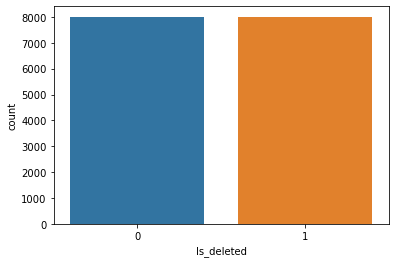

In [20]:
#Es wird geprüft, ob die getrennten Daten standisiert sind.
sns.countplot(x = y_train)

<AxesSubplot:xlabel='Is_deleted', ylabel='count'>

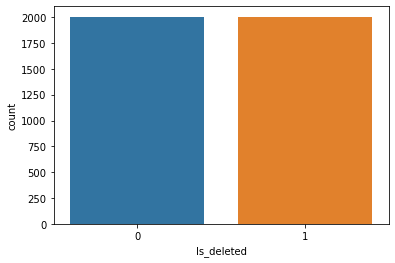

In [21]:
#Es wird geprüft, ob die getrennte Daten standisiert sind.
sns.countplot(x = y_test)

In [22]:
#Das Modell fiten
def fit_log_reg(X,y):
    l_regression = LogisticRegression(random_state=20, solver = 'lbfgs')
    l_regression.fit(X,y)
    return l_regression

In [23]:
l_regression = fit_log_reg(X_train, y_train)

In [24]:
#Das Modell wird gespeichert
pfad_modell = 'C:/Mo/tweetDB/tweetscov19/TweetsCov19_tsv/data_sample/Tweetscov19_sample/Modells/LR_Benutzer_Inhalt_alle_ohne_moderacy.sav'
#pickle.dump(l_regression, open(pfad_modell, 'wb'))

In [25]:
#Die Testsergebnisse vorhersagen
y_pred = l_regression.predict(X_test)

In [26]:
y_pred.shape

(4000,)

In [28]:
print('Accuracy (Test-Data) : ',l_regression.score(X_test, y_test))

Accuracy (Test-Data) :  0.74225


In [29]:
#Anhand der Testergebnisse wird ein Bericht vorbereitet und ausgegeben.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      2003
           1       0.74      0.74      0.74      1997

    accuracy                           0.74      4000
   macro avg       0.74      0.74      0.74      4000
weighted avg       0.74      0.74      0.74      4000



In [133]:
#Confusion_Matrix wird vorbereitet und dargestellt.
def plot_confusion_matrix(confu_matrix, classes, titel):
    sns.heatmap(confu_matrix, xticklabels = classes, yticklabels = classes, annot=True, cmap='YlGnBu')
    plt.title(titel)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[0.68247629 0.31752371]
 [0.39058588 0.60941412]]


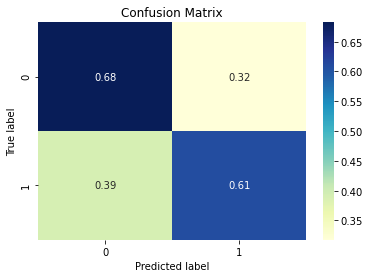

In [134]:
#Die Daten werden hier für Confusion Matrix vorbereitet.
#die Ergebnisse werden durch die gesammten Daten geteilt, sodass das Ergebnis auf eine Zahl zwischen 0 und 1 gebildet wird.
confusion_mx = confusion_matrix(y_test, y_pred)
confusion_mx = confusion_mx / confusion_mx.sum(axis=1).reshape(-1,1)
plot_confusion_matrix(confusion_mx, l_regression.classes_, 'Confusion Matrix')
print(confusion_mx)

In [135]:
#Hier wird wahrscheinlichkeiten der Ergebnisse berechnet.
#Anhand der bekommenen Wahrscheinlichkeiten berechnen wir die Log_loss.
y_prob = l_regression.predict_proba(X_train)
y_prob_test = l_regression.predict_proba(X_test)


In [136]:
#Logaritmic Loss wird her berechnet.
print('Logarithmic loss für Training data', log_loss(y_train, y_prob))
print('Logarithmic loss für Test data', log_loss(y_test, y_prob_test))

Logarithmic loss für Training data 0.6297425210262515
Logarithmic loss für Test data 0.6578599719915894


In [137]:
#Dads Modell laden
pfad_modell = 'C:/Mo/tweetDB/tweetscov19/TweetsCov19_tsv/data_sample/Tweetscov19_sample/Modells/LR_Benutzer_Inhalt_alle_ohne_moderacy.sav'
#l_regression = pickle.load(open(pfad_modell, 'rb'))

In [138]:
#Die Ergebnisse werden mithilfe der drei Metriken durch Kreuzverfahren berechnen. cv=10
scores = cross_val_score(l_regression, X_test, y_test, cv=10, scoring='precision')
print(" percision %0.2f +/- %0.3f" % (scores.mean(), scores.std()))
scores = cross_val_score(l_regression, X_test, y_test, cv=10, scoring='f1')
print(" f1        %0.2f +/- %0.3f" % (scores.mean(), scores.std()))
scores = cross_val_score(l_regression, X_test, y_test, cv=10, scoring='recall')
print(" recall    %0.2f +/- %0.3f" % (scores.mean(), scores.std()))

 percision 0.62 +/- 0.015
 f1        0.60 +/- 0.022
 recall    0.58 +/- 0.039


****************************************************************************
****************************************************************************

### Tweetscov19
#### (Nur Inhalt)

In [139]:
#Hier wird die Dataframe neu gebildet.
#Die Benutzerfeatuers werden entfernt.
#Die Dataframe wird in zwei Matrixen umgewandelt.
features = df_tweetscov19_user.columns
features

features = features[2:83]
df_tweetscov19_user_2 = df_tweetscov19_user[features.tolist()]
#df_tweetscov19_user_2 = df_tweetscov19_user_2.drop(columns=[ 'Moderacy p.T.'])

df = df_tweetscov19_user_2.drop('Is_deleted', axis=1)
X = df_tweetscov19_user_2.drop('Is_deleted', axis=1).values
y = df_tweetscov19_user_2['Is_deleted']

y = y.astype(int)
print(X.shape)
print(y.shape)

(20000, 80)
(20000,)


In [140]:
#Wichtigkeit der Features wird bestimmt.
features_cl = features_classifier(df , X, y)
features_cl

,index,Feature,importance
0,1,Likes,0.3858
1,0,Retweets,0.0697
2,10,Politische P.T.,0.0686
3,8,A. Emojis,0.0459
4,14,News(Shalla),0.0304
5,7,Lesbarkeit,0.0241
6,5,Textlänge,0.0220
7,21,Work,0.0175
8,63,Preposition,0.0167
9,68,Verb,0.0167


In [141]:
#Features mit einer Wichtigkeit größer als 0.
features_cl = features_cl[features_cl['importance']>0]
features_cl = features_cl.Feature.values
print('Number of selected features: ', len(features_cl))
print()
print(features_cl)

Number of selected features:  71

['Likes' 'Retweets' 'Politische P.T.' 'A. Emojis' 'News(Shalla)'
 'Lesbarkeit' 'Textlänge' 'Work' 'Preposition' 'Verb'
 'Wissenschaftliche P.T.' 'Health' 'Stimmung' 'Focus present'
 'Emoji sentiment' 'Quantitative' 'Adverb' 'Social' 'Neg. emo.' 'They'
 'Adjective' 'You' 'Power' 'Mentions' 'Hashtags' 'Article' 'Conjunctive'
 'Compare' 'Auxverb' 'Achieve' 'Interrogative' 'Space' 'Pos. emo.' 'Risk'
 'Ipron' 'Money' 'Number' 'Anger' 'Hear' 'Cause' 'URLs n.' 'Focus past'
 'Moderate P.T.' 'Death' 'Differentiation' 'SheHe' 'Time' 'Negate' 'Male'
 'Certainty' 'Motion' 'Body' 'Insight' 'See' 'Anxiety' 'Ingest'
 'Tentativness' 'Swear' 'Discrep' 'Relegion' 'We' 'Sexual' 'Affiliation'
 'Reward' 'I' 'Netspeak' 'Focus future' 'Home' 'Informal' 'Leisure'
 'Sadness']


In [142]:
X.shape

(20000, 80)

In [143]:
#Daten für das Trainig und Testing des Modells aufteilen.
X_train, X_test, y_train, y_test = split_train_test_valid(X,y)

(16000, 80)
(4000, 80)
(16000,)
(4000,)


<AxesSubplot:xlabel='Is_deleted', ylabel='count'>

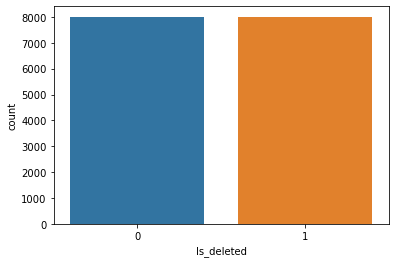

In [144]:
#Die Standardisierung der Training-Daten wird getestet.
sns.countplot(x = y_train)

<AxesSubplot:xlabel='Is_deleted', ylabel='count'>

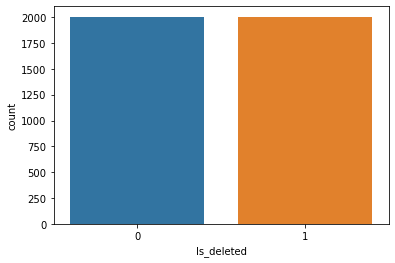

In [145]:
#Die Standardisierung der Test-Daten werden getestet.
sns.countplot(x = y_test)

In [146]:
#Das Modell fiten
l_regression = fit_log_reg(X_train,y_train)

In [147]:
#Das Modell speichern.
pfad_modell = 'C:/Mo/tweetDB/tweetscov19/TweetsCov19_tsv/data_sample/Tweetscov19_sample/Modells/TweetsCov19_LR_Inhalt_all_ohne_moderacy.sav'
#pickle.dump(l_regression, open(pfad_modell, 'wb'))

In [148]:
print('Accuracy : ',l_regression.score(X_train, y_train))

Accuracy :  0.648


In [149]:
#Die Testsergebnisse vorhersagen
y_pred = l_regression.predict(X_test)

In [150]:
#Anhand der Testergebnisse wird ein Bericht vorbereitet und ausgegeben.
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.66      0.67      0.66      2003
           1       0.66      0.66      0.66      1997

    accuracy                           0.66      4000
   macro avg       0.66      0.66      0.66      4000
weighted avg       0.66      0.66      0.66      4000



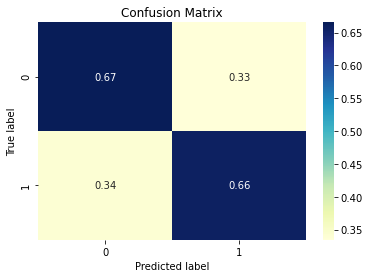

In [151]:
#Die Daten werden hier für Confusion Matrix vorbereitet.
#Die Ergebnisse durch die gesamten Daten wird geteilt, sodass das Ergebnis auf eine Zahl zwischen 0 und 1 gebildet wird.
confusion_mx = confusion_matrix(y_test, y_pred)
confusion_mx = confusion_mx / confusion_mx.sum(axis=1).reshape(-1,1)
plot_confusion_matrix(confusion_mx, l_regression.classes_, 'Confusion Matrix')

In [152]:
#Hier wird wahrscheinlichkeiten der Ergebnisse berechnet.
#Anhand der bekommenen Wahrscheinlichkeiten berechnen wir die Log_loss
y_prob = l_regression.predict_proba(X_train)
y_prob_test = l_regression.predict_proba(X_test)

In [153]:
#Logaritmic Loss wird hier berechnet und ausgegeben.
print('Logarithmic loss für Training data', log_loss(y_train, y_prob))
print('Logarithmic loss für Test data', log_loss(y_test, y_prob_test))

Logarithmic loss für Training data 0.6376695754285211
Logarithmic loss für Test data 0.6243732652370283


In [154]:
#Das Modell laden.
pfad_modell = 'C:/Mo/tweetDB/tweetscov19/TweetsCov19_tsv/data_sample/Tweetscov19_sample/Modells/TweetsCov19_LR_Inhalt_all_ohne_moderacy.sav'
#l_regression = pickle.load(open(pfad_modell, 'rb'))

In [155]:
#Die Ergebnisse werden mithilfe der drei Metriken durch Kreuzverfahren berechnen. cv=10
scores = cross_val_score(l_regression, X_test, y_test, cv=10, scoring='precision')
print(" percision %0.2f +/- %0.3f" % (scores.mean(), scores.std()))
scores = cross_val_score(l_regression, X_test, y_test, cv=10, scoring='f1')
print(" f1        %0.2f +/- %0.3f" % (scores.mean(), scores.std()))
scores = cross_val_score(l_regression, X_test, y_test, cv=10, scoring='recall')
print(" recall    %0.2f +/- %0.3f" % (scores.mean(), scores.std()))

 percision 0.66 +/- 0.010
 f1        0.66 +/- 0.011
 recall    0.65 +/- 0.025


****************************************************************
****************************************************************

## *(2)TweetsKB*
### (Inhalt- und Benutzerfeature)

In [156]:
#Die Dataframe, die sowohl die Benutzer- als auch die Inhaltsfeatures enthält, wird gelesen.
pfad_tsv = 'C:/Mo/tweetDB/tweetscov19/TweetsCov19_tsv/data_sample/Tweetskb_sample/TweetsFormodel/tweetskb_sample_with_users_1_51.tsv'

df_tweetskb_user = pd.read_csv(pfad_tsv, sep='\t', error_bad_lines=False, names=['Tweet_Id', 'Username', 'Is_deleted', 'Retweets', 'Likes', 'Stimmung', 'Hashtags', 'Mentions', 'Textlänge', 'URLs n.', 'Lesbarkeit', 'A. Emojis', 'Emoji sentiment', 'Politische P.T.', 'Wissenschaftliche P.T.', 'Moderate P.T.', 'Porn(Shalla)', 'News(Shalla)', 'Socialnet(Shalla)', 'Social', 'Family', 'Friend', 'Female', 'Male' , 'Work', 'Leisure', 'Home', 'Money', 'Relegion', 'Death', 'Informal', 'Swear', 'Netspeak', 'Assent', 'Nonfluence', 'Filler', 'Body', 'Health', 'Sexual', 'Ingest', 'Pos. emo.', 'Neg. emo.', 'Anxiety', 'Anger', 'Sadness', 'Insight', 'Cause', 'Discrep', 'Tentativness', 'Certainty', 'Differentiation', 'Affiliation', 'Achieve', 'Power', 'Reward', 'Risk', 'Focus past', 'Focus present', 'Focus future', 'I', 'We', 'You', 'SheHe', 'They', 'Ipron', 'Article', 'Preposition', 'Auxverb', 'Adverb', 'Conjunctive', 'Negate', 'Verb', 'Adjective', 'Compare', 'Interrogative', 'Number', 'Quantitative', 'See', 'Hear', 'Feel', 'Motion', 'Space', 'Time', 'Politische P.B.', 'Wissen. P.B.', 'Moderate P.B.', 'Posted n.', 'Deleted n.', 'Deletion ratio', 'Reputation'  ])
pd.options.display.max_columns = None
print('Shape :', df_tweetskb_user.shape)
df_tweetskb_user.head()

Shape : (20000, 90)


,Tweet_Id,Username,Is_deleted,Retweets,Likes,Stimmung,Hashtags,Mentions,Textlänge,URLs n.,Lesbarkeit,A. Emojis,Emoji sentiment,Politische P.T.,Wissenschaftliche P.T.,Moderate P.T.,Porn(Shalla),News(Shalla),Socialnet(Shalla),Social,Family,Friend,Female,Male,Work,Leisure,Home,Money,Relegion,Death,Informal,Swear,Netspeak,Assent,Nonfluence,Filler,Body,Health,Sexual,Ingest,Pos. emo.,Neg. emo.,Anxiety,Anger,Sadness,Insight,Cause,Discrep,Tentativness,Certainty,Differentiation,Affiliation,Achieve,Power,Reward,Risk,Focus past,Focus present,Focus future,I,We,You,SheHe,They,Ipron,Article,Preposition,Auxverb,Adverb,Conjunctive,Negate,Verb,Adjective,Compare,Interrogative,Number,Quantitative,See,Hear,Feel,Motion,Space,Time,Politische P.B.,Wissen. P.B.,Moderate P.B.,Posted n.,Deleted n.,Deletion ratio,Reputation
0,1250809251561263111,X14Eagle,True,9,20,0.9738,0,1,106,0,82.7570,6,0.5710,0,0,0,0.0000,0.0000,0.0000,13.3300,0.0000,0.0000,0.0000,0.0000,0.0000,13.3300,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6.6700,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6.6700,13.3300,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6.6700,6.6700,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6.6700,0.0000,6.6700,6.6700,0.0000,0.2000,-1.0000,-1.0000,16,16,1.0000,0.4777
1,1261189358176145408,battleofever,True,50,63,-0.4469,6,2,303,0,72.6330,4,0.1847,0,0,0,0.0000,0.0000,0.0000,8.1600,0.0000,0.0000,0.0000,4.0800,0.0000,0.0000,0.0000,0.0000,4.0800,0.0000,2.0400,2.0400,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0400,6.1200,0.0000,6.1200,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0400,0.0000,0.0000,0.0000,0.0000,2.0400,6.1200,0.0000,0.0000,2.0400,0.0000,0.0000,0.0000,4.0800,2.0400,10.2000,8.1600,0.0000,4.0800,0.0000,10.2000,4.0800,4.0800,0.0000,0.0000,0.0000,0.0000,2.0400,0.0000,0.0000,6.1200,0.0000,0.6000,-0.1667,0.4286,39,39,1.0000,0.4909
2,1250125070472597504,LastStand2019,True,0,0,-0.8025,0,0,227,1,92.6370,0,0.0000,1,-1,0,0.0000,0.0000,0.0000,14.6300,0.0000,0.0000,0.0000,7.3200,0.0000,0.0000,0.0000,2.4400,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.4400,2.4400,0.0000,2.4400,0.0000,2.4400,0.0000,0.0000,0.0000,2.4400,0.0000,2.4400,0.0000,0.0000,2.4400,0.0000,2.4400,4.8800,0.0000,0.0000,0.0000,0.0000,7.3200,0.0000,7.3200,2.4400,7.3200,9.7600,0.0000,2.4400,2.4400,19.5100,0.0000,2.4400,2.4400,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.4400,1.0000,-1.0000,1.0000,28,28,1.0000,0.5017
3,1254147529668726790,TRUMPMOVEMENTUS,True,0,0,0.5859,0,0,117,1,66.5280,0,0.0000,0,0,1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5.5600,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.6667,-0.6667,0.4286,32,32,1.0000,0.6114
4,1248292934316748802,wdunlap,True,9,21,-0.4199,1,0,320,0,36.6350,0,0.0000,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.8900,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.8900,0.0000,1.8900,0.0000,1.8900,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5.6600,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,9.4300,15.0900,1.8900,3.7700,3.7700,0.0000,1.8900,3.7700,3.7700,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.8900,11.3200,7.5500,0.6000,-0.1429,0.4545,65,21,0.3231,0.5021


In [157]:
#Die Anzahl der einzigartigen Benutzer in Dataframe
df_tweetskb_user.Username.unique().size

2535

In [158]:
#Gelöschte und nicht gelöschte Tweets trennen
df_tweetskb_del = df_tweetskb_user[df_tweetskb_user['Is_deleted']==True]
df_tweetskb_undel = df_tweetskb_user[df_tweetskb_user['Is_deleted']==False]

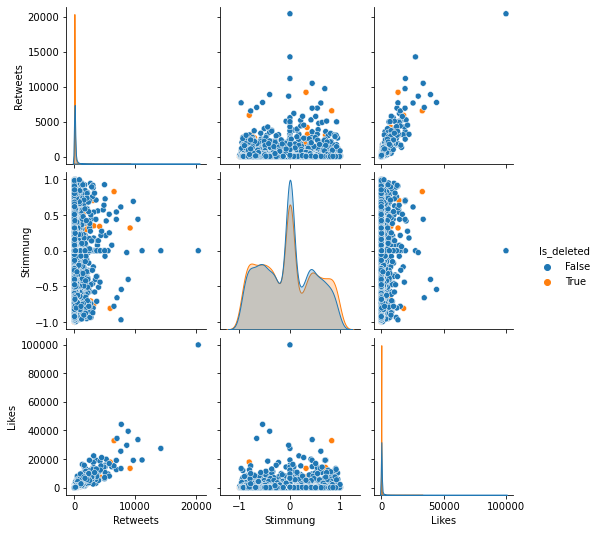

In [159]:
#Mithilfe von seaborn ein Pairplot von gegeben Features darstellen
df = df_tweetskb_user[['Is_deleted', 'Retweets', 'Stimmung', 'Likes']]
plot_paiplot(df, 'Is_deleted', 'pairplot_tweetskb_Retweet_favoriet_sentiment')

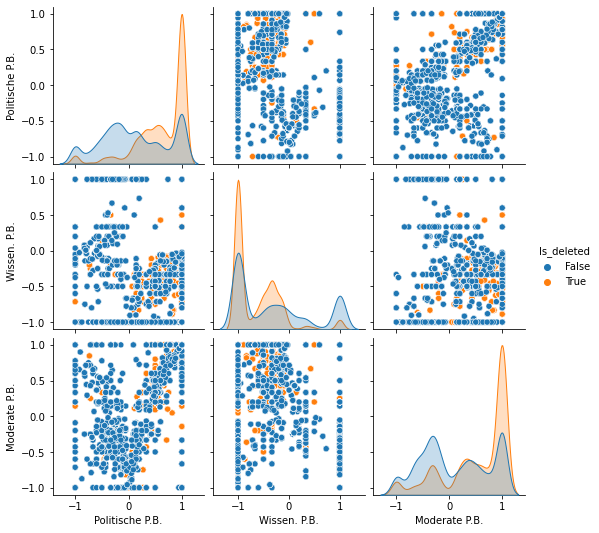

In [160]:
#Mithilfe von seaborn ein Pairplot von gegeben Features darstellen
df = df_tweetskb_user[['Is_deleted', 'Politische P.B.', 'Wissen. P.B.', 'Moderate P.B.']]
plot_paiplot(df, 'Is_deleted', 'pairplot_tweetskb_politic_science_moderacy')

<AxesSubplot:xlabel='Is_deleted', ylabel='count'>

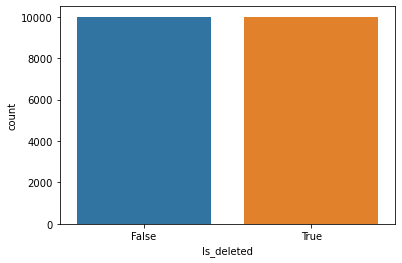

In [161]:
#Die Anzahl der gelöschten und nicht gelöschten Tweets werden dargestellt 
sns.countplot(x = 'Is_deleted', data = df)

In [162]:
#Features von Dataframe wird ausgewählt
features = df_tweetskb_user.columns
features

Index(['Tweet_Id', 'Username', 'Is_deleted', 'Retweets', 'Likes', 'Stimmung',
       'Hashtags', 'Mentions', 'Textlänge', 'URLs n.', 'Lesbarkeit',
       'A. Emojis', 'Emoji sentiment', 'Politische P.T.',
       'Wissenschaftliche P.T.', 'Moderate P.T.', 'Porn(Shalla)',
       'News(Shalla)', 'Socialnet(Shalla)', 'Social', 'Family', 'Friend',
       'Female', 'Male', 'Work', 'Leisure', 'Home', 'Money', 'Relegion',
       'Death', 'Informal', 'Swear', 'Netspeak', 'Assent', 'Nonfluence',
       'Filler', 'Body', 'Health', 'Sexual', 'Ingest', 'Pos. emo.',
       'Neg. emo.', 'Anxiety', 'Anger', 'Sadness', 'Insight', 'Cause',
       'Discrep', 'Tentativness', 'Certainty', 'Differentiation',
       'Affiliation', 'Achieve', 'Power', 'Reward', 'Risk', 'Focus past',
       'Focus present', 'Focus future', 'I', 'We', 'You', 'SheHe', 'They',
       'Ipron', 'Article', 'Preposition', 'Auxverb', 'Adverb', 'Conjunctive',
       'Negate', 'Verb', 'Adjective', 'Compare', 'Interrogative', 'Number',
 

In [163]:
#Die gelöscten Tweets mit 0 und nicht gelösschten mit 1 werden markiert.
df_tweetskb_user['Is_deleted'] = np.where(df_tweetskb_user['Is_deleted'] == True, 0, 1)
df_tweetskb_user.head()

,Tweet_Id,Username,Is_deleted,Retweets,Likes,Stimmung,Hashtags,Mentions,Textlänge,URLs n.,Lesbarkeit,A. Emojis,Emoji sentiment,Politische P.T.,Wissenschaftliche P.T.,Moderate P.T.,Porn(Shalla),News(Shalla),Socialnet(Shalla),Social,Family,Friend,Female,Male,Work,Leisure,Home,Money,Relegion,Death,Informal,Swear,Netspeak,Assent,Nonfluence,Filler,Body,Health,Sexual,Ingest,Pos. emo.,Neg. emo.,Anxiety,Anger,Sadness,Insight,Cause,Discrep,Tentativness,Certainty,Differentiation,Affiliation,Achieve,Power,Reward,Risk,Focus past,Focus present,Focus future,I,We,You,SheHe,They,Ipron,Article,Preposition,Auxverb,Adverb,Conjunctive,Negate,Verb,Adjective,Compare,Interrogative,Number,Quantitative,See,Hear,Feel,Motion,Space,Time,Politische P.B.,Wissen. P.B.,Moderate P.B.,Posted n.,Deleted n.,Deletion ratio,Reputation
0,1250809251561263111,X14Eagle,0,9,20,0.9738,0,1,106,0,82.7570,6,0.5710,0,0,0,0.0000,0.0000,0.0000,13.3300,0.0000,0.0000,0.0000,0.0000,0.0000,13.3300,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6.6700,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6.6700,13.3300,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6.6700,6.6700,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6.6700,0.0000,6.6700,6.6700,0.0000,0.2000,-1.0000,-1.0000,16,16,1.0000,0.4777
1,1261189358176145408,battleofever,0,50,63,-0.4469,6,2,303,0,72.6330,4,0.1847,0,0,0,0.0000,0.0000,0.0000,8.1600,0.0000,0.0000,0.0000,4.0800,0.0000,0.0000,0.0000,0.0000,4.0800,0.0000,2.0400,2.0400,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0400,6.1200,0.0000,6.1200,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0400,0.0000,0.0000,0.0000,0.0000,2.0400,6.1200,0.0000,0.0000,2.0400,0.0000,0.0000,0.0000,4.0800,2.0400,10.2000,8.1600,0.0000,4.0800,0.0000,10.2000,4.0800,4.0800,0.0000,0.0000,0.0000,0.0000,2.0400,0.0000,0.0000,6.1200,0.0000,0.6000,-0.1667,0.4286,39,39,1.0000,0.4909
2,1250125070472597504,LastStand2019,0,0,0,-0.8025,0,0,227,1,92.6370,0,0.0000,1,-1,0,0.0000,0.0000,0.0000,14.6300,0.0000,0.0000,0.0000,7.3200,0.0000,0.0000,0.0000,2.4400,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.4400,2.4400,0.0000,2.4400,0.0000,2.4400,0.0000,0.0000,0.0000,2.4400,0.0000,2.4400,0.0000,0.0000,2.4400,0.0000,2.4400,4.8800,0.0000,0.0000,0.0000,0.0000,7.3200,0.0000,7.3200,2.4400,7.3200,9.7600,0.0000,2.4400,2.4400,19.5100,0.0000,2.4400,2.4400,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.4400,1.0000,-1.0000,1.0000,28,28,1.0000,0.5017
3,1254147529668726790,TRUMPMOVEMENTUS,0,0,0,0.5859,0,0,117,1,66.5280,0,0.0000,0,0,1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5.5600,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.6667,-0.6667,0.4286,32,32,1.0000,0.6114
4,1248292934316748802,wdunlap,0,9,21,-0.4199,1,0,320,0,36.6350,0,0.0000,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.8900,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.8900,0.0000,1.8900,0.0000,1.8900,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5.6600,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,9.4300,15.0900,1.8900,3.7700,3.7700,0.0000,1.8900,3.7700,3.7700,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.8900,11.3200,7.5500,0.6000,-0.1429,0.4545,65,21,0.3231,0.5021


In [164]:
#TweetId und Benutzername aus der Dataframe entfernen.
features = features[2:90]

In [165]:
# Die Features, Anzahl der geposteten und gelöschten Tweets sowie Löschquote erden hier aus der Dataframe entfernt.
#Zwei Matrixen werden erzeugt. Einer beinhaltet alle Features ohne 'Ist_gelöscht' und die andere nur 'Ist_gelöscht' 

df_tweetskb_user_2 = df_tweetskb_user[features.tolist()]
df_tweetskb_user_2 = df_tweetskb_user_2.drop(columns=[  'Posted n.', 'Deleted n.', 'Deletion ratio'])
df = df_tweetskb_user_2.drop('Is_deleted', axis=1)
X = df_tweetskb_user_2.drop('Is_deleted', axis=1).values
y = df_tweetskb_user_2['Is_deleted']

y = y.astype(int)
print(X.shape)
print(y.shape)

(20000, 84)
(20000,)


In [166]:
#Wichtigkeit der Features wird bestimmt.
features_cl = features_classifier(df , X, y)
features_cl

,index,Feature,importance
0,80,Politische P.B.,0.3845
1,83,Reputation,0.3465
2,82,Moderate P.B.,0.1109
3,81,Wissen. P.B.,0.0682
4,0,Retweets,0.0094
5,1,Likes,0.0087
6,7,Lesbarkeit,0.0068
7,5,Textlänge,0.0058
8,4,Mentions,0.0047
9,3,Hashtags,0.0046


In [167]:
#Features, die eine Wichtigkeit größer als 0 haben.
features_cl = features_cl[features_cl['importance']>0]
features_cl = features_cl.Feature.values
print(features_cl)

['Politische P.B.' 'Reputation' 'Moderate P.B.' 'Wissen. P.B.' 'Retweets'
 'Likes' 'Lesbarkeit' 'Textlänge' 'Mentions' 'Hashtags' 'Ipron'
 'Preposition' 'URLs n.' 'A. Emojis' 'Stimmung' 'Work' 'Article'
 'Moderate P.T.' 'Compare' 'We' 'Verb' 'Quantitative' 'Power'
 'Emoji sentiment' 'Focus present' 'Insight' 'Space' 'Time'
 'Differentiation' 'Adjective' 'Neg. emo.' 'Netspeak' 'Body'
 'Interrogative' 'Focus past' 'Focus future' 'Conjunctive' 'Hear' 'Negate'
 'Pos. emo.' 'Adverb' 'Motion' 'Auxverb' 'Female' 'Social'
 'Wissenschaftliche P.T.' 'Male' 'Achieve' 'SheHe' 'Discrep' 'Health']


In [168]:
X.shape

(20000, 84)

In [169]:
#Hier werden die Daten in zwei Teilen für das Trainieren und den Test des Modells aufgeteilt.
X_train, X_test, y_train, y_test  = split_train_test_valid(X,y)

(16000, 84)
(4000, 84)
(16000,)
(4000,)


<AxesSubplot:xlabel='Is_deleted', ylabel='count'>

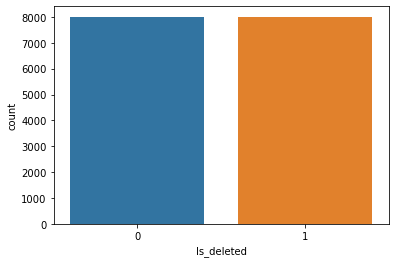

In [170]:
#Es wird hier geprüft, ob die getrennten Daten standisiert sind.
sns.countplot(x = y_train)

<AxesSubplot:xlabel='Is_deleted', ylabel='count'>

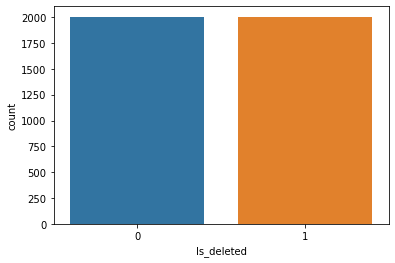

In [171]:
#Es wird hier geprüft, ob die getrennten Daten standisiert sind.
sns.countplot(x = y_test)

In [172]:
#Das Modell fiten
l_regression = fit_log_reg(X_train, y_train)

In [173]:
#Das Modell speichern.
pfad_modell = 'C:/Mo/tweetDB/tweetscov19/TweetsCov19_tsv/data_sample/Tweetskb_sample/Modells/TweetsKB_LR_Benutzer_Inhalt_alle_ohne_moderacy.sav'
#pickle.dump(l_regression, open(pfad_modell, 'wb'))

In [174]:
print('Accuracy : ',l_regression.score(X_train, y_train))

Accuracy :  0.7243125


In [175]:
#Die Testsergebnisse vorhersagen
y_pred = l_regression.predict(X_test)

In [176]:
#Anhand der Testrgebnisse wird ein Bericht vorbereitet und ausgegeben.
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.70      0.76      0.72      2003
           1       0.73      0.67      0.70      1997

    accuracy                           0.71      4000
   macro avg       0.71      0.71      0.71      4000
weighted avg       0.71      0.71      0.71      4000



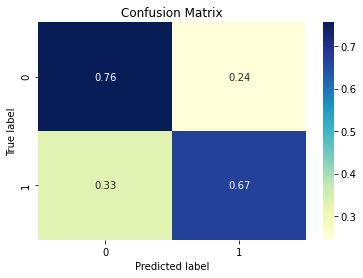

In [177]:
#Die Daten werden hier für Confusion Matrix vorbereitet.
#Die Ergebnisse durch die gesamten Daten teilen, sodass das Ergebnis auf eine Zahl zwischen 0 und 1 gebildet wird.
confusion_mx = confusion_matrix(y_test, y_pred)
confusion_mx = confusion_mx / confusion_mx.sum(axis=1).reshape(-1,1)
plot_confusion_matrix(confusion_mx, l_regression.classes_, 'Confusion Matrix')

In [178]:
#Hier wird wahrscheinlichkeiten der Ergebnisse berechnet.
#Anhand der bekommenen Wahrscheinlichkeiten berechnen wir die Log_loss
y_prob = l_regression.predict_proba(X_train)
y_prob_test = l_regression.predict_proba(X_test)


In [179]:
#Logaritmic Loss wird hier berechnet und ausgegeben.

print('Logarithmic loss für Training data', log_loss(y_train, y_prob))
print('Logarithmic loss für Test data', log_loss(y_test, y_prob_test))

Logarithmic loss für Training data 0.57504768108993
Logarithmic loss für Test data 0.6092061978587607


In [180]:
#Das modell laden
pfad_modell = 'C:/Mo/tweetDB/tweetscov19/TweetsCov19_tsv/data_sample/Tweetskb_sample/Modells/TweetsKB_LR_Benutzer_Inhalt_alle_ohne_moderacy.sav'
#l_regression = pickle.load(open(pfad_modell, 'rb'))

In [181]:
#Die Ergebnisse werden mithilfe der drei Metriken durch Kreuzverfahren berechnen. cv=10

scores = cross_val_score(l_regression, X_test, y_test, cv=10, scoring='precision')
print(" percision %0.2f +/- %0.3f" % (scores.mean(), scores.std()))
scores = cross_val_score(l_regression, X_test, y_test, cv=10, scoring='f1')
print(" f1        %0.2f +/- %0.3f" % (scores.mean(), scores.std()))
scores = cross_val_score(l_regression, X_test, y_test, cv=10, scoring='recall')
print(" recall    %0.2f +/- %0.3f" % (scores.mean(), scores.std()))

 percision 0.70 +/- 0.023
 f1        0.68 +/- 0.022
 recall    0.66 +/- 0.026


**********************************************************************
**********************************************************************

### TweetsKB
#### (Nur Inhalt)

In [182]:
#Hier wird die Dataframe neu gebildet.
#Die Benutzerfeatuers werden entfernt.
#Die Dataframe wird in zwei Matrixen umgewandelt.
features = df_tweetskb_user.columns
features

features = features[2:83]
df_tweetskb_user_2 = df_tweetskb_user[features.tolist()]
#df_tweetskb_user_2 = df_tweetskb_user_2.drop(columns=[ 'Moderacy p.T.'])

df = df_tweetskb_user_2.drop('Is_deleted', axis=1)
X = df_tweetskb_user_2.drop('Is_deleted', axis=1).values
y = df_tweetskb_user_2['Is_deleted']

y = y.astype(int)
print(X.shape)
print(y.shape)

(20000, 80)
(20000,)


In [183]:
features

Index(['Is_deleted', 'Retweets', 'Likes', 'Stimmung', 'Hashtags', 'Mentions',
       'Textlänge', 'URLs n.', 'Lesbarkeit', 'A. Emojis', 'Emoji sentiment',
       'Politische P.T.', 'Wissenschaftliche P.T.', 'Moderate P.T.',
       'Porn(Shalla)', 'News(Shalla)', 'Socialnet(Shalla)', 'Social', 'Family',
       'Friend', 'Female', 'Male', 'Work', 'Leisure', 'Home', 'Money',
       'Relegion', 'Death', 'Informal', 'Swear', 'Netspeak', 'Assent',
       'Nonfluence', 'Filler', 'Body', 'Health', 'Sexual', 'Ingest',
       'Pos. emo.', 'Neg. emo.', 'Anxiety', 'Anger', 'Sadness', 'Insight',
       'Cause', 'Discrep', 'Tentativness', 'Certainty', 'Differentiation',
       'Affiliation', 'Achieve', 'Power', 'Reward', 'Risk', 'Focus past',
       'Focus present', 'Focus future', 'I', 'We', 'You', 'SheHe', 'They',
       'Ipron', 'Article', 'Preposition', 'Auxverb', 'Adverb', 'Conjunctive',
       'Negate', 'Verb', 'Adjective', 'Compare', 'Interrogative', 'Number',
       'Quantitative', 'See', 'H

In [184]:
#Wichtigkeit der Features wird bestimmt.

features_cl = features_classifier(df , X, y)
features_cl

,index,Feature,importance
0,1,Likes,0.2730
1,0,Retweets,0.1398
2,10,Politische P.T.,0.1154
3,8,A. Emojis,0.0785
4,5,Textlänge,0.0348
5,63,Preposition,0.0282
6,7,Lesbarkeit,0.0254
7,14,News(Shalla),0.0204
8,4,Mentions,0.0175
9,2,Stimmung,0.0143


In [185]:
#Features, die wie Wichtigkeit größer als 0 haben.
features_cl = features_cl[features_cl['importance']>0]
features_cl = features_cl.Feature.values
print(features_cl)

['Likes' 'Retweets' 'Politische P.T.' 'A. Emojis' 'Textlänge'
 'Preposition' 'Lesbarkeit' 'News(Shalla)' 'Mentions' 'Stimmung' 'Verb'
 'Work' 'Space' 'Moderate P.T.' 'Focus past' 'Number'
 'Wissenschaftliche P.T.' 'Adjective' 'Ipron' 'Insight' 'Power' 'SheHe'
 'Article' 'Achieve' 'Conjunctive' 'Adverb' 'Neg. emo.' 'Leisure' 'Social'
 'Hashtags' 'Cause' 'Anger' 'Female' 'Tentativness' 'Pos. emo.' 'Time'
 'See' 'Auxverb' 'Sadness' 'Death' 'Reward' 'Health' 'Focus future'
 'Negate' 'Affiliation' 'You' 'Hear' 'Quantitative' 'Money' 'Informal'
 'Emoji sentiment' 'Certainty' 'They' 'Compare' 'Sexual' 'Differentiation'
 'Body' 'Focus present' 'Assent' 'Discrep' 'Relegion' 'Interrogative' 'I'
 'Home' 'Motion' 'Filler' 'URLs n.']


In [186]:
#X = df_tweetscov19_user_2[features_cl.tolist()].values
X.shape

(20000, 80)

In [187]:
#Daten werden für das Trainig und Testing aufteilt.
X_train, X_test, y_train, y_test  = split_train_test_valid(X,y)

(16000, 80)
(4000, 80)
(16000,)
(4000,)


<AxesSubplot:xlabel='Is_deleted', ylabel='count'>

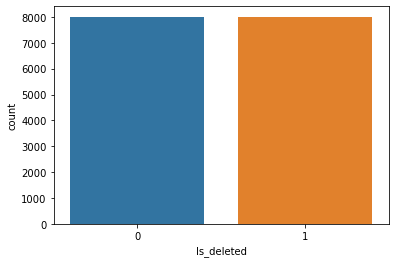

In [188]:
#Die Standardisierung der Training-Daten wird geprüft.
sns.countplot(x = y_train)

<AxesSubplot:xlabel='Is_deleted', ylabel='count'>

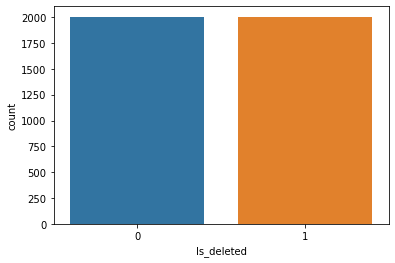

In [189]:
#Die Standardisierung der Testing-Daten wird geprüft.
sns.countplot(x = y_test)

In [190]:
#Das Modell fiten
l_regression = fit_log_reg(X_train, y_train)

In [191]:
#Das Modell wird gespeichert.
pfad_modell = 'C:/Mo/tweetDB/tweetscov19/TweetsCov19_tsv/data_sample/Tweetskb_sample/Modells/TweetsKB_LR_Inhalt_alle_ohne_moderacy.sav'
#pickle.dump(l_regression, open(pfad_modell, 'wb'))

In [192]:
print('Accuracy : ',l_regression.score(X_test, y_test))


Accuracy :  0.646


In [193]:
#Die Testsergebnisse vorhersagen
y_pred = l_regression.predict(X_test)

In [194]:
#Anhand der Training-Ergebnisse wird ein Bericht vorbereitet und ausgegeben.

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.64      0.68      0.66      2003
           1       0.66      0.61      0.63      1997

    accuracy                           0.65      4000
   macro avg       0.65      0.65      0.65      4000
weighted avg       0.65      0.65      0.65      4000



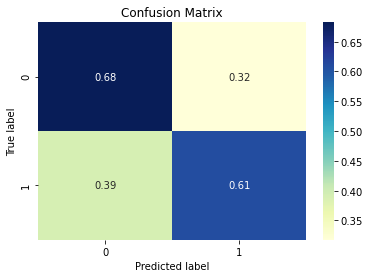

In [195]:
#Die Daten für Confusion Matrix bekommen.
# Die Ergebnisse werden durch die gesamten Daten geteilt, sodass das Ergebnis auf eine Zahl zwischen 0 und 1 gebildet wird.
confusion_mx = confusion_matrix(y_test, y_pred)
confusion_mx = confusion_mx / confusion_mx.sum(axis=1).reshape(-1,1)
plot_confusion_matrix(confusion_mx, l_regression.classes_, 'Confusion Matrix')

In [196]:
#Hier werden wahrscheinlichkeiten der Ergebnisse berechnet.
#Anhand der bekommenen Wahrscheinlichkeiten berechnen wir das Log_loss
y_prob = l_regression.predict_proba(X_train)
y_prob_test = l_regression.predict_proba(X_test)

In [197]:
#Logaritmic Loss berechnen.
print('Logarithmic loss für Training data', log_loss(y_train, y_prob))
print('Logarithmic loss für Test data', log_loss(y_test, y_prob_test))

Logarithmic loss für Training data 0.6297425210262515
Logarithmic loss für Test data 0.6578599719915894


In [198]:
#Das Modell laden
pfad_modell = 'C:/Mo/tweetDB/tweetscov19/TweetsCov19_tsv/data_sample/Tweetskb_sample/Modells/TweetsKB_LR_Inhalt_alle_ohne_moderacy.sav'
#l_regression = pickle.load(open(pfad_modell, 'rb'))

In [199]:
#Die Ergebnisse werden mithilfe der drei Metriken durch Kreuzverfahren berechnet. cv=10

scores = cross_val_score(l_regression, X_test, y_test, cv=10, scoring='precision')
print(" percision %0.2f +/- %0.3f" % (scores.mean(), scores.std()))
scores = cross_val_score(l_regression, X_test, y_test, cv=10, scoring='f1')
print(" f1        %0.2f +/- %0.3f" % (scores.mean(), scores.std()))
scores = cross_val_score(l_regression, X_test, y_test, cv=10, scoring='recall')
print(" recall    %0.2f +/- %0.3f" % (scores.mean(), scores.std()))

 percision 0.62 +/- 0.015
 f1        0.60 +/- 0.022
 recall    0.58 +/- 0.039
